In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Local -> all other imports in source files
import settings.custom
from prophandler import PropHandler

from __utils import visualize_prop_ratio
from backup_projections import load_backup_projections

SITE = "draftkings"
MODE = "classic" # all changes have been made for "showdown" to replace "single-game"
# MODE = 'showdown'

# TOMORROW = False

BACKUP_EDITS_FILE = '../data/backup_projections.json'
# BACKUP_EDITS_FILE = [
#     '../data/historical/2025-05-14.csv',
#     '../data/historical/2025-05-18.csv'
# ]

EDITS = load_backup_projections(file=BACKUP_EDITS_FILE)

In [2]:
handler = PropHandler(
    SITE,
    MODE,
    edits=EDITS,
    # tomorrow=TOMORROW
)

In [3]:
df = handler.load(
    # Late additions to injury report
    inactive=[],
    update=True,
    sort="fpts/$",
    # sort='fpts'
    # sort='salary',
)

# First run of day (needs to update URL directory): ~6-8 minutes

   ----------------------------------------
   Beginning WebScrape of NBA Player Props.
   ----------------------------------------
Prop projection only: 
Player props added for: Nikola Jokic, projection went from 59.8 -> 60.62 (+++++).
Player props added for: Giannis Antetokounmpo, projection went from 59.7 -> 59.38 (-----).
Player props added for: Pascal Siakam, projection went from 49.3 -> 44.88 (-----).
Player props added for: Cade Cunningham, projection went from 49.1 -> 51.38 (+++++).
Player props added for: Karl-Anthony Towns, projection went from 47.9 -> 47.62 (-----).
Player props added for: Alperen Sengun, projection went from 46.0 -> 45.12 (-----).
Player props added for: Jalen Brunson, projection went from 45.9 -> 45.88 (-----).
Player props added for: Julius Randle, projection went from 43.4 -> 43.62 (+++++).
Player props added for: Jaylen Brown, projection went from 43.3 -> 41.88 (-----).
Player props added for: Domantas Sabonis, projection went from 41.8 -> 41.38 (-----)

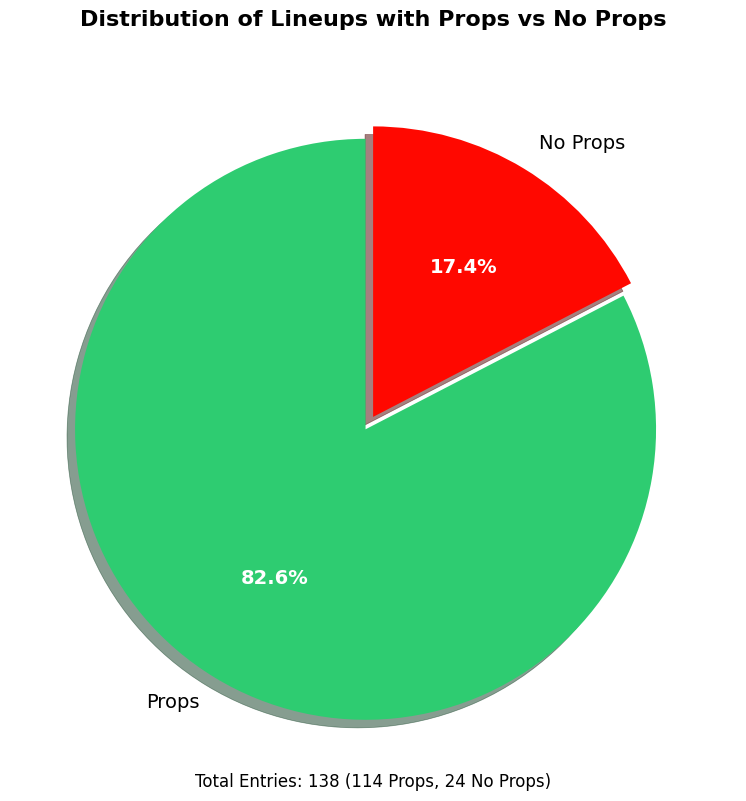

In [4]:
own_df = (pd
          .read_csv(f'/home/deegs/devel/repos/nba-boxscores-git/nba-boxscores/data/2024-2025/contest-files/{SITE}/current/current-ownership.csv')
          .set_index('name')
         )

df['own'] = df.index.map(lambda name: own_df.loc[name, 'own'] if name in own_df.index else 1)

if not df.loc[df['no-props']==1].empty:
    try:
        fig = visualize_prop_ratio(df, cutoff=0.0)
        display(fig)  # Only display once
        plt.close(fig)
    except ValueError:
        print('No props available. Using backup projections for all players.\n')

In [5]:
df

,pos,salary,team,fpts,e_fpts,fpts/$,e_fpts/$,value,no-props,own
name,,,,,,,,,,
Payton Pritchard,PG/SG,6300,BOS,36.62,17.64,5.813,2.800,5.12,0,20.0
Tyrese Martin,SG/SF,3600,BKN,20.88,10.60,5.800,2.944,2.88,0,31.0
Karl-Anthony Towns,PF,8500,NY,47.62,24.57,5.602,2.891,5.12,0,39.0
Tari Eason,SF/PF,4600,HOU,25.38,13.02,5.517,2.830,2.38,0,19.0
Ryan Rollins,PG,5800,MIL,31.88,16.16,5.497,2.786,2.88,0,22.0
Jusuf Nurkic,C,4800,UTA,26.12,14.18,5.442,2.954,2.12,0,35.0
Derrick White,PG,7200,BOS,39.12,20.06,5.433,2.786,3.12,0,24.0
Cam Thomas,SG,6800,BKN,36.12,18.72,5.312,2.753,2.12,0,6.0
Jalen Duren,C,7000,DET,36.88,19.70,5.269,2.814,1.88,0,15.0


In [6]:
# set(df.index)

In [7]:
def compare_combos(*combos):
    return {
        combo: df.loc[df.index.isin(combo), 'fpts'].sum()
        for combo in pairs
    }

In [8]:
def top_n_team_distribution(N: int, **kwargs):
    return (df
            [:N]
            .groupby('team')
            [['team']]
            .agg(['count'])
            [('team', 'count')]
            .sort_values(ascending=True)
            .plot
            .barh(
                title=f'Team distribution for top {N} projected players',
                figsize=(9,6)
            )
           )

# top_n_team_distribution(15);

In [9]:
team_dfs = {
    team:
    df.loc[df['team'] == team]
    for team in df['team'].drop_duplicates()
}

In [10]:
import numpy as np
team_dfs[str(np.random.choice(list(team_dfs.keys())))]

,pos,salary,team,fpts,e_fpts,fpts/$,e_fpts/$,value,no-props,own
name,,,,,,,,,,
Jusuf Nurkic,C,4800,UTA,26.12,14.18,5.442,2.954,2.12,0,35.0
Keyonte George,PG/SG,7100,UTA,35.88,18.38,5.054,2.589,0.38,0,8.0
Taylor Hendricks,SF/PF,3400,UTA,16.12,9.03,4.741,2.656,-0.88,0,13.0
Lauri Markkanen,SF,8100,UTA,38.38,20.33,4.738,2.510,-2.12,0,3.0
Svi Mykhailiuk,SG,4300,UTA,18.12,8.75,4.214,2.035,-3.38,0,1.0
Walter Clayton,PG,4000,UTA,15.62,7.99,3.905,1.998,-4.38,0,0.0
Ace Bailey,SG/SF,4700,UTA,16.38,8.57,3.485,1.823,-7.12,0,0.0
Kyle Filipowski,PF,5000,UTA,16.62,7.71,3.324,1.542,-8.38,0,4.0
Kevin Love,C,3200,UTA,9.70,0.00,3.031,0.000,-16.00,1,0.0


#### `handler.constant_scrape()`
##### Repeatedly scrapes props, making sure always as up to date as possible and saving behind the scenes.
##### Caveats include the fact it has an infinite loop built in and that it is pretty useless when it comes to playoffs since books much more on top of lines then.

In [11]:
# handler.constant_scrape(verbose=0)

# 

In [12]:
def get_players_in_range(**kwargs):

    SALARY_RANGE = range(
        kwargs.get('minsal', min(df['salary'])),
        kwargs.get('maxsal', max(df['salary'])),
        100
    )
    
    TEAMS = kwargs.get('team', kwargs.get('teams', list(df['team'].drop_duplicates())))
    if isinstance(TEAMS, str):
        TEAMS = [TEAMS]

    POSITIONS = kwargs.get('pos', list(df['pos'].drop_duplicates()))
    if kwargs.get('pos') in ('G', 'F'):
        POSITIONS = [pos_ for pos_ in df['pos'].drop_duplicates() if kwargs['pos'] in pos_]
    
    return (df
            .loc[
            (df['salary'].isin(SALARY_RANGE)) 
            & (df['team'].isin(TEAMS))
            & (df['pos'].isin(POSITIONS))
            ]
            .sort_values('fpts', ascending=False)
           )

In [13]:
# get_players_in_range(minsal=8_000, maxsal=9_500)